# Лаба 1_1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('student_scores.csv')
df.sample(10)

,Hours,Scores
14,1.1,17
11,5.9,62
13,3.3,42
15,8.9,95
3,8.5,75
10,7.7,85
18,6.1,67
20,2.7,30
2,3.2,27
1,5.1,47


#### Статистическая информация о используемых данных

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### График

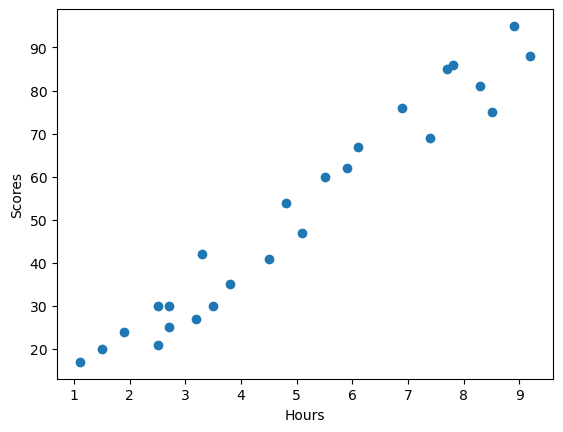

In [13]:
plt.scatter(df['Hours'], df['Scores'])

plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

#### Уравнение регрессионной прямой: $y=ax+b$, где $a = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}$, $b = \overline{y} - a\overline{x}$

In [14]:
x_mean = df['Hours'].mean()
y_mean = df['Scores'].mean()

numerator = ((df['Hours'] - x_mean) * (df['Scores'] - y_mean)).sum()
denominator = ((df['Hours'] - x_mean) ** 2).sum()

a = numerator / denominator
b = y_mean - a * x_mean

print(f'Уравнение регрессионной прямой: y = {a:.2f}x + {b:.2f}')

Уравнение регрессионной прямой: y = 9.78x + 2.48


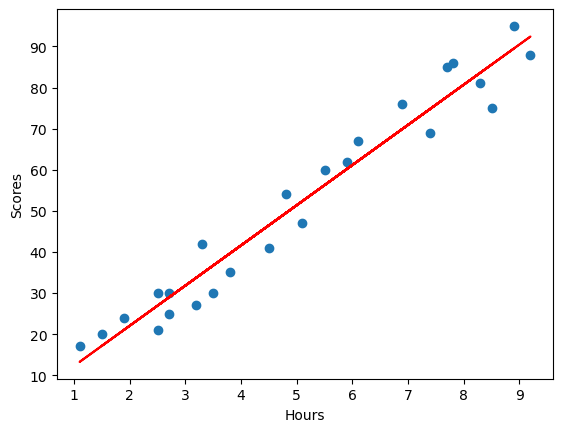

In [33]:
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], a * df['Hours'] + b, color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

#### Визуализация квадратов ошибок

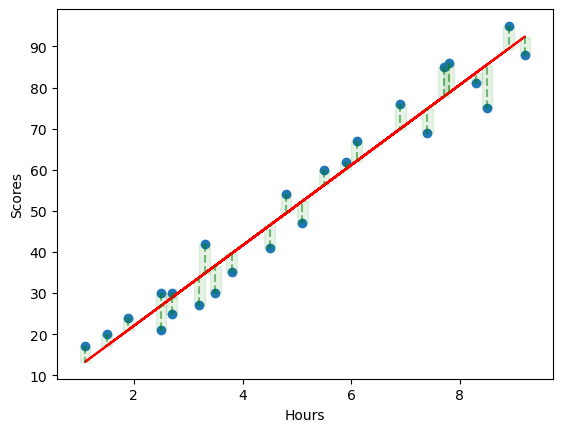

In [37]:
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], a * df['Hours'] + b, color='r')

for _, row in df.iterrows():
    x, y = row['Hours'], row['Scores']
    y_pred = a * x + b
    plt.plot([x, x], [y, y_pred], color='green', linestyle='--', alpha=0.5)
    plt.fill_between([x - 0.1, x + 0.1], [y_pred, y_pred], [y, y], color='green', alpha=0.1)

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()